# Preparation & Cleaning of the ON Colleges Enrolment by Credentials worksheet

In [141]:
# open the excel file on 22-23 Stats sheet as a pandas dataframe
# imports

import openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
# load and read the Credentials sheet from the workbook
creds_df = pd.read_excel('/Users/thomasdoherty/Desktop/canadian-psi-project/psi_data/cleaning_copy_excel/on_college_2012-/2012-2022 college_enrolment_headcount.xlsx', sheet_name='Credentials')

In [143]:
creds_df

,College Name,Fiscal Year,Credential Type Description,Headcount Full-Time Fall
0,Algonquin College,2012-2013,Certificate,2577
1,Algonquin College,2012-2013,Degree (includes applied degree),381
2,Algonquin College,2012-2013,Diploma,13110
3,Algonquin College,2012-2013,General Equivalency Diploma / High School Diploma,0
4,Algonquin College,2012-2013,Not Available or Not Applicable,0
...,...,...,...,...
1159,St. Lawrence College,2022-2023,Certificate,2262
1160,St. Lawrence College,2022-2023,Degree (includes applied degree),755
1161,St. Lawrence College,2022-2023,Diploma,8227
1162,St. Lawrence College,2022-2023,Not Applicable,0


In [144]:
creds_df.shape

(1164, 4)

In [145]:
# Remove the '20' prefix from the fiscal year entries
creds_df['Fiscal Year'] = creds_df['Fiscal Year'].apply(lambda x: f"{x[2:4]}-{x[7:]}") # this is a lambda function that takes the third and fourth characters and the last two characters of the string

# Display the updated DataFrame to verify the change
print(creds_df[['Fiscal Year']].head())

  Fiscal Year
0       12-13
1       12-13
2       12-13
3       12-13
4       12-13


**Remember that any instances of between 0-9 in Headcount have * in them from the original MCU Data. We will replace * with 5 as an estimate**

In [146]:
# replace instances of * in Headcount with 5
creds_df['Headcount Full-Time Fall'] = creds_df['Headcount Full-Time Fall'].replace('*', 5)

/var/folders/jj/bww8jnqd2lg73nm4k1z5kbmc0000gn/T/ipykernel_76888/817690558.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  creds_df['Headcount Full-Time Fall'] = creds_df['Headcount Full-Time Fall'].replace('*', 5)


In [147]:
creds_df.shape

(1164, 4)

### Add a TOTAL Full-Time Enrolment figure for each school in each year, so we can build a % share of the credential in the student body

In [148]:
# group the data by each college, every year, and find the total head count
creds_df.groupby(['College Name', 'Fiscal Year'])['Headcount Full-Time Fall'].sum()

College Name          Fiscal Year
Algonquin College     12-13          16068
                      13-14          16844
                      14-15          17025
                      15-16          17435
                      16-17          17385
                                     ...  
St. Lawrence College  18-19           8795
                      19-20           9014
                      20-21           9228
                      21-22           9037
                      22-23          11244
Name: Headcount Full-Time Fall, Length: 264, dtype: int64

In [149]:
# add a column that displays the total headcount in that year for each college
creds_df["School's Total Headcount This Year"] = creds_df.groupby(['College Name', 'Fiscal Year'])['Headcount Full-Time Fall'].transform('sum')

In [150]:
creds_df

,College Name,Fiscal Year,Credential Type Description,Headcount Full-Time Fall,School's Total Headcount This Year
0,Algonquin College,12-13,Certificate,2577,16068
1,Algonquin College,12-13,Degree (includes applied degree),381,16068
2,Algonquin College,12-13,Diploma,13110,16068
3,Algonquin College,12-13,General Equivalency Diploma / High School Diploma,0,16068
4,Algonquin College,12-13,Not Available or Not Applicable,0,16068
...,...,...,...,...,...
1159,St. Lawrence College,22-23,Certificate,2262,11244
1160,St. Lawrence College,22-23,Degree (includes applied degree),755,11244
1161,St. Lawrence College,22-23,Diploma,8227,11244
1162,St. Lawrence College,22-23,Not Applicable,0,11244


Above: I've now added a column which allows us to calculate the share of students non a given Credential type against the entire student body.

I want to clean up the lengthy and inconsistent Credential Type Descriptions. Some of the records are 'Not Applicable', some are 'Not Available or Not Applicable' so I will combine the records to state Not Applicable below

In [151]:
creds_df.loc[
    (creds_df['Credential Type Description'] == 'Not Applicable') | 
    (creds_df['Credential Type Description'] == 'Not Available or Not Applicable'), 
    'Credential Type Description'] = 'Not Applicable'

I will now add **share of the student headcount** which each credential type has. What credentials dominate the school landscape?

In [152]:
# New column which divides Headcount Full-Time Fall by School's Total Headcount This Year
creds_df['Credential Share of Headcount'] = round((creds_df['Headcount Full-Time Fall'] / creds_df["School's Total Headcount This Year"]) * 100, 2)

In [153]:
creds_df

,College Name,Fiscal Year,Credential Type Description,Headcount Full-Time Fall,School's Total Headcount This Year,Credential Share of Headcount
0,Algonquin College,12-13,Certificate,2577,16068,16.04
1,Algonquin College,12-13,Degree (includes applied degree),381,16068,2.37
2,Algonquin College,12-13,Diploma,13110,16068,81.59
3,Algonquin College,12-13,General Equivalency Diploma / High School Diploma,0,16068,0.00
4,Algonquin College,12-13,Not Applicable,0,16068,0.00
...,...,...,...,...,...,...
1159,St. Lawrence College,22-23,Certificate,2262,11244,20.12
1160,St. Lawrence College,22-23,Degree (includes applied degree),755,11244,6.71
1161,St. Lawrence College,22-23,Diploma,8227,11244,73.17
1162,St. Lawrence College,22-23,Not Applicable,0,11244,0.00


## Pivoting the Dataframe - each record will be the College in a given Year and columns will be the credential's share of the student headcount

In [154]:
# pivot the table to get each Credential's headcount share as columns

creds_df_pivot = creds_df.pivot_table(
    index=['College Name', 'Fiscal Year', "School's Total Headcount This Year"], # setting the index specifies which columns to keep as is
    columns = 'Credential Type Description', # this is the record data we will transform into column data
    values = 'Credential Share of Headcount' # this is the data we will use to fill the new columns of Credential Description, once we've renamed to Share of the Headcount
).reset_index()

In [155]:
creds_df_pivot

Credential Type Description,College Name,Fiscal Year,School's Total Headcount This Year,Attestation and other credentials for short programs,Certificate,Degree (includes applied degree),Diploma,General Equivalency Diploma / High School Diploma,Not Applicable,Other type of credential associated with a program
0,Algonquin College,12-13,16068,NaN,16.04,2.37,81.59,0.0,0.0,NaN
1,Algonquin College,13-14,16844,NaN,16.96,2.59,80.45,0.0,0.0,NaN
2,Algonquin College,14-15,17025,NaN,17.25,2.98,79.77,0.0,0.0,NaN
3,Algonquin College,15-16,17435,NaN,17.75,3.14,79.11,0.0,0.0,NaN
4,Algonquin College,16-17,17385,NaN,17.69,3.52,78.79,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
259,St. Lawrence College,18-19,8795,0.0,12.13,9.72,78.15,NaN,0.0,0.00
260,St. Lawrence College,19-20,9014,0.0,12.76,9.20,78.05,NaN,0.0,0.00
261,St. Lawrence College,20-21,9228,0.0,11.07,8.86,76.07,NaN,0.0,3.99
262,St. Lawrence College,21-22,9037,0.0,15.83,9.13,73.10,NaN,0.0,1.94


In [156]:
# Rename the columns
creds_df_pivot.rename(columns={
    'Attestation and other credentials for short programs': 'Attestation % of Headcount',
    'Certificate': 'Certificate % of Headcount',
    'Degree (includes applied degree)': 'Degree/applied degree % of Headcount',
    'Diploma': 'Diploma % of Headcount',
    'General Equivalency Diploma / High School Diploma': 'GED % of Headcount',
    'Not Applicable': 'NA % of Headcount',
    'Other type of credential associated with a program': 'Other % of Headcount',
}, inplace=True)

In [157]:
# remove the column name Gender Description
creds_df_pivot.columns.name = None

In [158]:
# overwrite the df with the new pivoted version
creds_df = creds_df_pivot

In [159]:
creds_df

,College Name,Fiscal Year,School's Total Headcount This Year,Attestation % of Headcount,Certificate % of Headcount,Degree/applied degree % of Headcount,Diploma % of Headcount,GED % of Headcount,NA % of Headcount,Other % of Headcount
0,Algonquin College,12-13,16068,NaN,16.04,2.37,81.59,0.0,0.0,NaN
1,Algonquin College,13-14,16844,NaN,16.96,2.59,80.45,0.0,0.0,NaN
2,Algonquin College,14-15,17025,NaN,17.25,2.98,79.77,0.0,0.0,NaN
3,Algonquin College,15-16,17435,NaN,17.75,3.14,79.11,0.0,0.0,NaN
4,Algonquin College,16-17,17385,NaN,17.69,3.52,78.79,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
259,St. Lawrence College,18-19,8795,0.0,12.13,9.72,78.15,NaN,0.0,0.00
260,St. Lawrence College,19-20,9014,0.0,12.76,9.20,78.05,NaN,0.0,0.00
261,St. Lawrence College,20-21,9228,0.0,11.07,8.86,76.07,NaN,0.0,3.99
262,St. Lawrence College,21-22,9037,0.0,15.83,9.13,73.10,NaN,0.0,1.94


### Dealing with Nulls

In [160]:
creds_df.isna().sum()

College Name                              0
Fiscal Year                               0
School's Total Headcount This Year        0
Attestation % of Headcount              239
Certificate % of Headcount                0
Degree/applied degree % of Headcount     54
Diploma % of Headcount                    0
GED % of Headcount                      237
NA % of Headcount                        23
Other % of Headcount                    185
dtype: int64

Thoughts on above:

- I don't think GEDs and Attestations are very relevant to the overall picture and almost all entries are null, the rest are likely some zeroes. I will drop Attestation and GED for now.
- I will fill these with zero as I will with the others, but the focus of the analysis should be on Diplomas, Certificates and Degrees.
- It may be apparently in EDA that it is a select few schools offering the degree programs / GEDs

In [161]:
# drop Attestation and GED
creds_df.drop(['Attestation % of Headcount', 'GED % of Headcount'], axis=1, inplace=True)

In [167]:
creds_df

,College Name,Fiscal Year,School's Total Headcount This Year,Certificate % of Headcount,Degree/applied degree % of Headcount,Diploma % of Headcount,NA % of Headcount,Other % of Headcount
0,Algonquin College,12-13,16068,16.04,2.37,81.59,0.0,0.00
1,Algonquin College,13-14,16844,16.96,2.59,80.45,0.0,0.00
2,Algonquin College,14-15,17025,17.25,2.98,79.77,0.0,0.00
3,Algonquin College,15-16,17435,17.75,3.14,79.11,0.0,0.00
4,Algonquin College,16-17,17385,17.69,3.52,78.79,0.0,0.00
...,...,...,...,...,...,...,...,...
259,St. Lawrence College,18-19,8795,12.13,9.72,78.15,0.0,0.00
260,St. Lawrence College,19-20,9014,12.76,9.20,78.05,0.0,0.00
261,St. Lawrence College,20-21,9228,11.07,8.86,76.07,0.0,3.99
262,St. Lawrence College,21-22,9037,15.83,9.13,73.10,0.0,1.94


In [166]:
# fillna with 0
creds_df.fillna(0, inplace=True)

## EDA

How has the distribution or share of credentials changed over the last 10-12 years?

Colleges are known for Certificates (9 month to one-year programs) and Diplomas (2 years or 4 semesters) and Associates Degrees (2 - 3 years) which are less common in Canada than the United States, but it may be problematic if there is a large proliferation of certificates as opposed to diplomas or degrees. Is this just filling the lower rung of the qualification funnel?

Setting up matplotlib:
- Split the colleges in two and focus on degrees, diplomas and certificates separately for now, before we notice any trends to hone in on

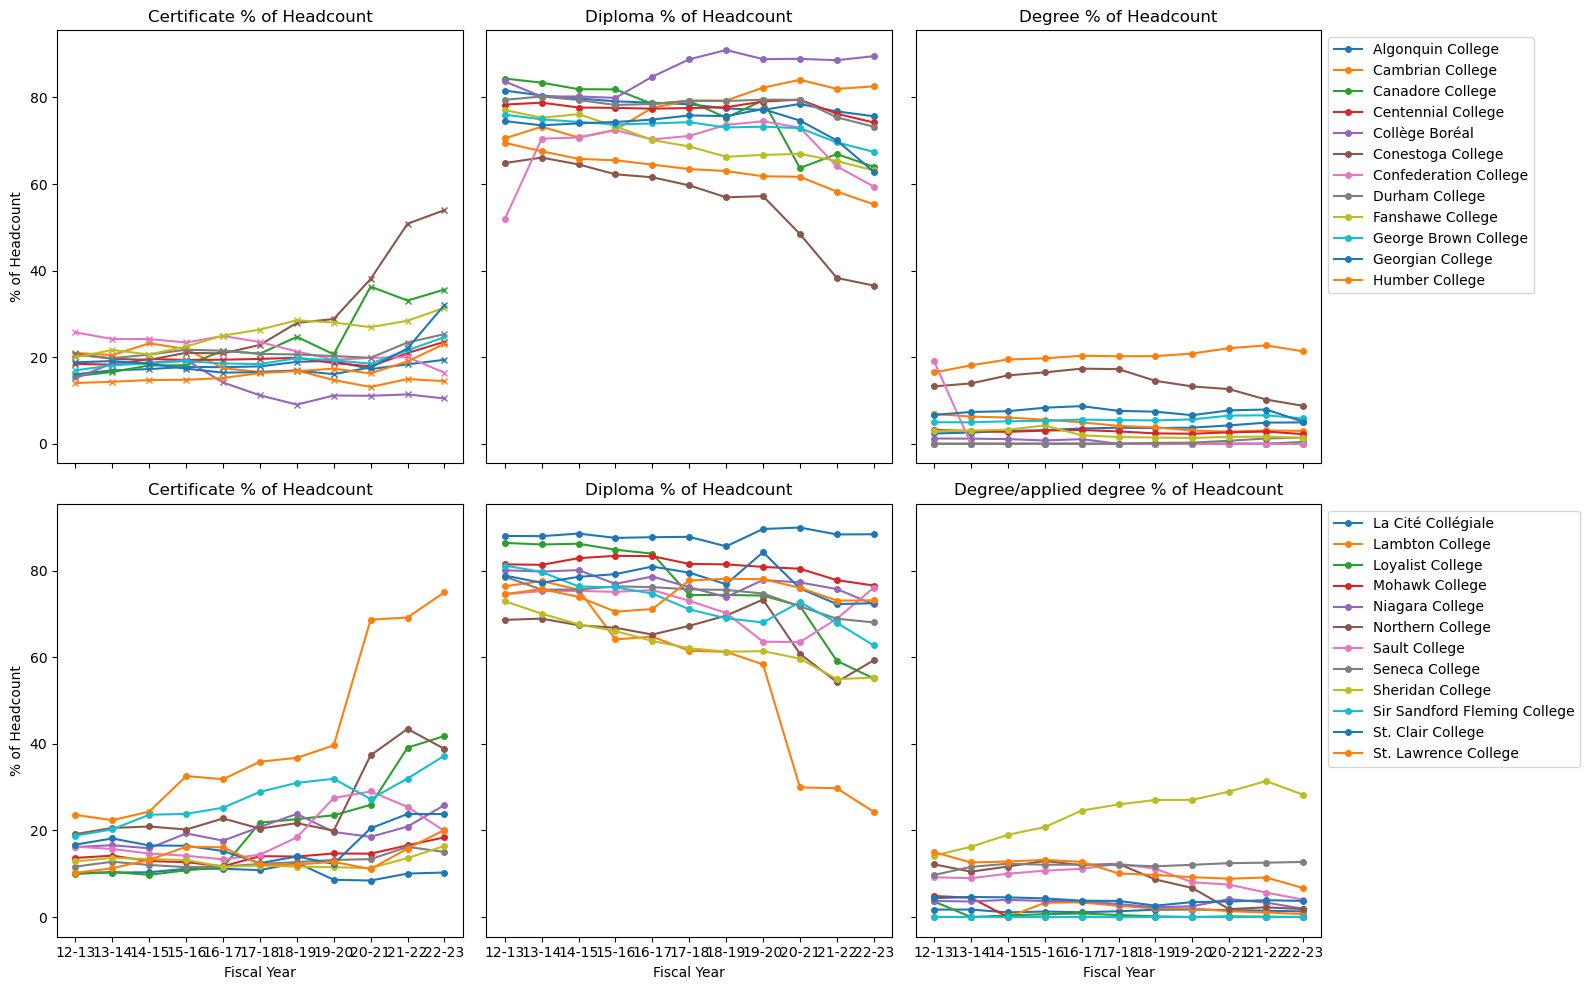

In [173]:
# Get the unique colleges and split them into two halves
colleges = creds_df['College Name'].unique()
half_index = len(colleges) // 2
colleges_first_half = colleges[:half_index] # index up to the half way point
colleges_second_half = colleges[half_index:] # index from the half way point to the end

# Set up a 3x2 grid of subplots, first half certificate/diploma/degree on one row, second half certificate/diploma/degree on the second row
fig, axes = plt.subplots(2, 3, figsize=(16, 10), sharex=True, sharey=True) # sharex and sharey make sure all subplots have the same x and y axis, fig, axes is a tuple of the figure and the axes

# First row of plots: First half of colleges
# First plot: Certificate % of Headcount
for college in colleges_first_half:
    college_data = creds_df[creds_df['College Name'] == college]
    axes[0, 0].plot(
        college_data['Fiscal Year'],
        college_data['Certificate % of Headcount'],
        label=college,
        marker='x',
        markersize=4
    )
axes[0, 0].set_title('Certificate % of Headcount')
axes[0, 0].set_ylabel('% of Headcount')

# Second plot: Diploma % of Headcount
for college in colleges_first_half:
    college_data = creds_df[creds_df['College Name'] == college]
    axes[0, 1].plot(
        college_data['Fiscal Year'],
        college_data['Diploma % of Headcount'],
        label=college,
        marker='o',
        markersize=4
    )
axes[0, 1].set_title('Diploma % of Headcount')

# Third plot: Degree % of Headcount with legend
for college in colleges_first_half:
    college_data = creds_df[creds_df['College Name'] == college]
    axes[0, 2].plot(
        college_data['Fiscal Year'],
        college_data['Degree/applied degree % of Headcount'],
        label=college,
        marker='o',
        markersize=4
    )
axes[0, 2].set_title('Degree % of Headcount')
axes[0, 2].legend(loc='upper left', bbox_to_anchor=(1, 1)) # just the one legend for the first row

# Second row of plots: Second half of colleges
# Fourth plot: Certificate % of Headcount
for college in colleges_second_half:
    college_data = creds_df[creds_df['College Name'] == college]
    axes[1, 0].plot(
        college_data['Fiscal Year'],
        college_data['Certificate % of Headcount'],
        label=college,
        marker='o',
        markersize=4
    )
axes[1, 0].set_title('Certificate % of Headcount')
axes[1, 0].set_ylabel('% of Headcount')
axes[1, 0].set_xlabel('Fiscal Year')

# Fifth plot: Diploma % of Headcount
for college in colleges_second_half:
    college_data = creds_df[creds_df['College Name'] == college]
    axes[1, 1].plot(
        college_data['Fiscal Year'],
        college_data['Diploma % of Headcount'],
        label=college,
        marker='o',
        markersize=4
    )
axes[1, 1].set_title('Diploma % of Headcount')
axes[1, 1].set_xlabel('Fiscal Year')

# Sixth plot: Degree % of Headcount
for college in colleges_second_half:
    college_data = creds_df[creds_df['College Name'] == college]
    axes[1, 2].plot(
        college_data['Fiscal Year'],
        college_data['Degree/applied degree % of Headcount'],
        label=college,
        marker='o',
        markersize=4
    )
axes[1, 2].set_title('Degree/applied degree % of Headcount')
axes[1, 2].set_xlabel('Fiscal Year')
axes[1, 2].legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Thoughts on the above:
- Lambton college made huge changes and broke away early. They offer degrees and diplomas but a massive blast into certificates and the change is almost mirrored completely by diplomas decreasing in frequency, with degrees dropping likely around 8-10% of the student populace
- Conestoga also rapidly invested into certificates from 17-18 more gradually
- Sheridan becoming more degree-focused, certificates also slightly growing as diplomas become less prominent on campus.

In [174]:
# look at changes of Conestoga College and Lambton College from 2012 to 2022
creds_df[creds_df['College Name'] == 'Conestoga College']

,College Name,Fiscal Year,School's Total Headcount This Year,Certificate % of Headcount,Degree/applied degree % of Headcount,Diploma % of Headcount,NA % of Headcount,Other % of Headcount
55,Conestoga College,12-13,10461,20.75,13.25,64.85,0.575,0.0
56,Conestoga College,13-14,10806,19.61,13.93,66.11,0.175,0.0
57,Conestoga College,14-15,11004,19.40,15.79,64.53,0.140,0.0
58,Conestoga College,15-16,11492,21.01,16.49,62.25,0.120,0.0
59,Conestoga College,16-17,11651,20.87,17.35,61.56,0.105,0.0
60,Conestoga College,17-18,12545,22.84,17.24,59.69,0.115,0.0
61,Conestoga College,18-19,15386,27.92,14.53,56.93,0.310,0.0
62,Conestoga College,19-20,16945,28.82,13.24,57.20,0.370,0.0
63,Conestoga College,20-21,18157,38.07,12.62,48.46,0.425,0.0
64,Conestoga College,21-22,22532,50.83,10.21,38.31,0.325,0.0


In [175]:
creds_df[creds_df['College Name'] == 'Lambton College']

,College Name,Fiscal Year,School's Total Headcount This Year,Certificate % of Headcount,Degree/applied degree % of Headcount,Diploma % of Headcount,NA % of Headcount,Other % of Headcount
143,Lambton College,12-13,3484,23.59,0.00,76.41,0.0,0.0
144,Lambton College,13-14,3289,22.38,0.00,77.62,0.0,0.0
145,Lambton College,14-15,3116,24.36,0.00,75.64,0.0,0.0
146,Lambton College,15-16,3470,32.56,3.29,64.15,0.0,0.0
147,Lambton College,16-17,3392,31.84,3.39,64.77,0.0,0.0
148,Lambton College,17-18,4454,35.90,2.58,61.52,0.0,0.0
149,Lambton College,18-19,5406,36.77,1.98,61.25,0.0,0.0
150,Lambton College,19-20,5073,39.66,1.97,58.37,0.0,0.0
151,Lambton College,20-21,8321,68.71,1.35,29.95,0.0,0.0
152,Lambton College,21-22,10684,69.20,1.05,29.75,0.0,0.0


In [191]:
# see what the diploma figures are in raw numbers for Lambton college
print("Number of Certificate students at Lambton in 12-13 of a total 3483 is", + round(3484 * 0.2359, 0) )
print("Number of Diploma students at Lambton in 12-13 of a total 3484 is", + round(3484 * 0.7641,0) )
print("\n")
print("Number of Certificate students at Lambton in 17-18 of a total 4454 is", + round(4454 * 0.3590, 0) )
print("Number of Diploma students at Lambton in 17-18 of a total 4454 is", + round(4454 * 0.7641,0) )
print("\n")
print("Number of Certificate students at Lambton in 19-20 of a total 5073 is", + round(5073 * 0.3966, 0) )
print("Number of Diploma students at Lambton in 19-20 of a total 5073 is", + round(5073 * 0.5837,0) )
print("\n")
print("Number of Certificate students at Lambton in 20-21 of a total 8321 is", + round(8321 * 0.6871, 0) )
print("Number of Diploma students at Lambton in 20-21 of a total 8321 is", + round(8321 * 0.2995,0) )

Number of Certificate students at Lambton in 12-13 of a total 3483 is 822.0
Number of Diploma students at Lambton in 12-13 of a total 3484 is 2662.0


Number of Certificate students at Lambton in 17-18 of a total 4454 is 1599.0
Number of Diploma students at Lambton in 17-18 of a total 4454 is 3403.0


Number of Certificate students at Lambton in 19-20 of a total 5073 is 2012.0
Number of Diploma students at Lambton in 19-20 of a total 5073 is 2961.0


Number of Certificate students at Lambton in 20-21 of a total 8321 is 5717.0
Number of Diploma students at Lambton in 20-21 of a total 8321 is 2492.0


They have almost divested from Diplomas to focus exclusively on one year certificates, as the share in degree students has also gone from zero in 12-13, beginning the offering in 15-16, to barely two-thirds of a percentage point in 22-23

## Change in offering?

I want to note whether these institutions **offer** certain qualifications like degrees, as well as the change in enrolment to these programs.

**Next step: Look at the student numbers in each of those Credential types and track their changes Year-on-Year**

## Year-on-year change in enrolment?

In [ ]:
# What is the headcount for degree programs for each school in each year?
degrees.groupby(['College Name', 'Fiscal Year'])['Headcount Full-Time Fall'].sum()

College Name          Fiscal Year
Algonquin College     2012-2013      381
                      2013-2014      437
                      2014-2015      507
                      2015-2016      548
                      2016-2017      612
                                    ... 
St. Lawrence College  2018-2019      855
                      2019-2020      829
                      2020-2021      818
                      2021-2022      825
                      2022-2023      755
Name: Headcount Full-Time Fall, Length: 210, dtype: int64